In [21]:
import jax
import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp

sns.set_theme()

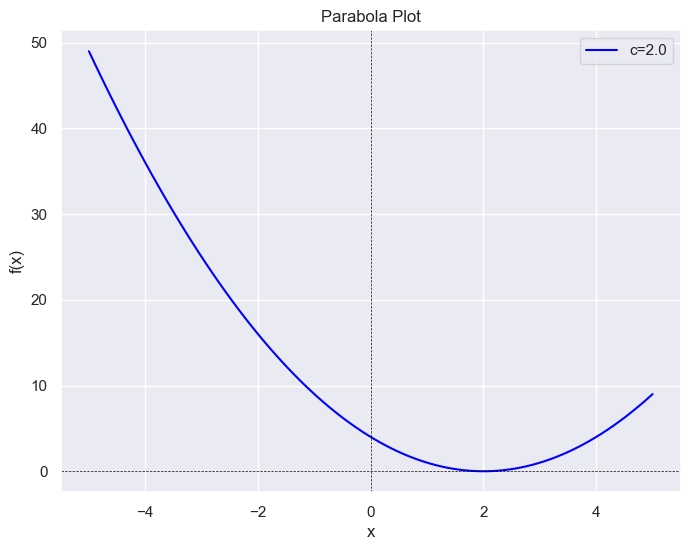

In [22]:
def parabola(x, c):
    return (x-c) ** 2

def plot_parabola(c):
    x = jnp.linspace(-5, 5, 100)
    y = parabola(x, c)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'c={c}', color='blue')
    plt.title('Parabola Plot')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.show()

plot_parabola(2.0)

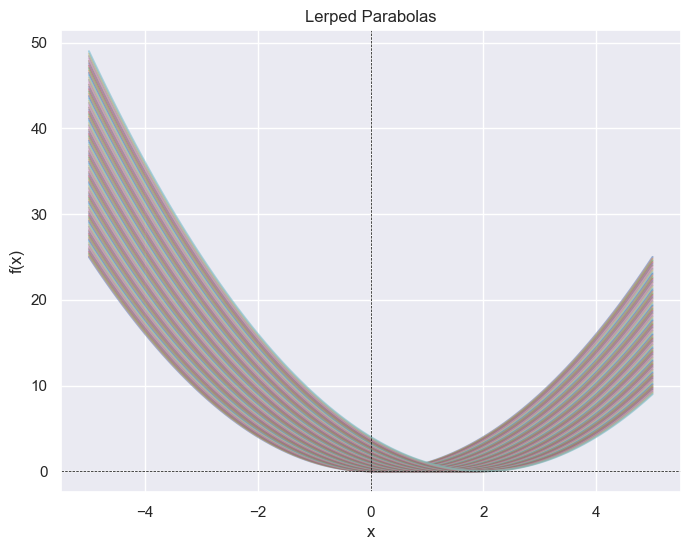

In [23]:
def lerp(a, b, t):
    return (1-t) * a + t * b

def plotPrabolaLerp(c1, c2):
    x = jnp.linspace(-5, 5, 100)
    t = jnp.linspace(0, 1, 100)
    cs = lerp(c1, c2, t)
    ys = jax.vmap(parabola, in_axes=(None, 0))(x, cs)
    plt.figure(figsize=(8, 6))
    for i in range(ys.shape[0]):
        plt.plot(x, ys[i], label=f'c={cs[i]:.2f}', alpha=0.5)
    plt.title('Lerped Parabolas')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.show()
plotPrabolaLerp(0, 2)

$$
H(x, t)\\
H(x*(t), t) = 0 \\
$$

In [24]:
@jax.jit
def H(x, t, startC, endC):
    c = lerp(startC, endC, t)
    return parabola(x, c)

#Compute the derivative of H with respect to t
dH_dx = jax.jacobian(H, argnums=0)
dH_dt = jax.jacobian(H, argnums=1)

dx_dt = jax.jit(lambda x, t, startC, endC: -dH_dt(x, t, startC, endC)/dH_dx(x, t, startC, endC))

dH_dx(0.0, 0., 0.0, 2.0), dH_dt(0.0, 0., 0.0, 2.0), dx_dt(0.0 + 1e-30, 0.0, 0.0, 2.0)

(Array(0., dtype=float32, weak_type=True),
 Array(0., dtype=float32, weak_type=True),
 Array(2., dtype=float32, weak_type=True))

In [25]:
import plotly.graph_objs as go

startC = 0.0
endC = 2.0


def plot_derivatives_plotly():
    x = jnp.linspace(-5, 5, 100)
    t = jnp.linspace(0, 1, 100)
    X, T = jnp.meshgrid(x, t)

    # Compute derivatives on the grid
    dH_dx_grid = jax.vmap(lambda t_: jax.vmap(lambda x_: dH_dx(x_, t_, startC, endC))(x))(t)
    dH_dt_grid = jax.vmap(lambda t_: jax.vmap(lambda x_: dH_dt(x_, t_, startC, endC))(x))(t)
    dx_dt_grid = jax.vmap(lambda t_: jax.vmap(lambda x_: dx_dt(x_, t_, startC, endC))(x))(t)

    fig = go.Figure()

    fig.add_trace(go.Surface(z=dH_dx_grid, x=X, y=T, colorscale='Blues', opacity=0.7, name='dH/dx', showscale=False))
    fig.add_trace(go.Surface(z=dH_dt_grid, x=X, y=T, colorscale='Reds', opacity=0.7, name='dH/dt', showscale=False))
    fig.add_trace(go.Surface(z=dx_dt_grid, x=X, y=T, colorscale='Greens', opacity=0.7, name='dx/dt', showscale=False))

    fig.update_layout(
        title='Derivatives of H with respect to x and t',
        scene=dict(
            xaxis_title='x',
            yaxis_title='t',
            zaxis_title='Derivative Value'
        ),
        legend=dict(itemsizing='constant')
    )
    fig.show()

plot_derivatives_plotly()
    

Step 1/100, t=0.00, bestX=10.0000, H(bestX, t)=81.0000
Step 1/100, t=0.00, bestX=1.0314, H(bestX, t)=0.0010
Step 2/100, t=0.01, bestX=11.0314, H(bestX, t)=0.0010
Step 2/100, t=0.01, bestX=11.0314, H(bestX, t)=0.0010
Step 3/100, t=0.02, bestX=21.0314, H(bestX, t)=0.0010
Step 3/100, t=0.02, bestX=21.0314, H(bestX, t)=0.0010
Step 4/100, t=0.03, bestX=31.0314, H(bestX, t)=0.0010
Step 4/100, t=0.03, bestX=31.0314, H(bestX, t)=0.0010
Step 5/100, t=0.04, bestX=41.0314, H(bestX, t)=0.0010
Step 5/100, t=0.04, bestX=41.0314, H(bestX, t)=0.0010
Step 6/100, t=0.05, bestX=51.0314, H(bestX, t)=0.0010
Step 6/100, t=0.05, bestX=51.0314, H(bestX, t)=0.0010
Step 7/100, t=0.06, bestX=61.0314, H(bestX, t)=0.0010
Step 7/100, t=0.06, bestX=61.0314, H(bestX, t)=0.0010
Step 8/100, t=0.07, bestX=71.0314, H(bestX, t)=0.0010
Step 8/100, t=0.07, bestX=71.0314, H(bestX, t)=0.0010
Step 9/100, t=0.08, bestX=81.0314, H(bestX, t)=0.0010
Step 9/100, t=0.08, bestX=81.0314, H(bestX, t)=0.0010
Step 10/100, t=0.09, bestX=9

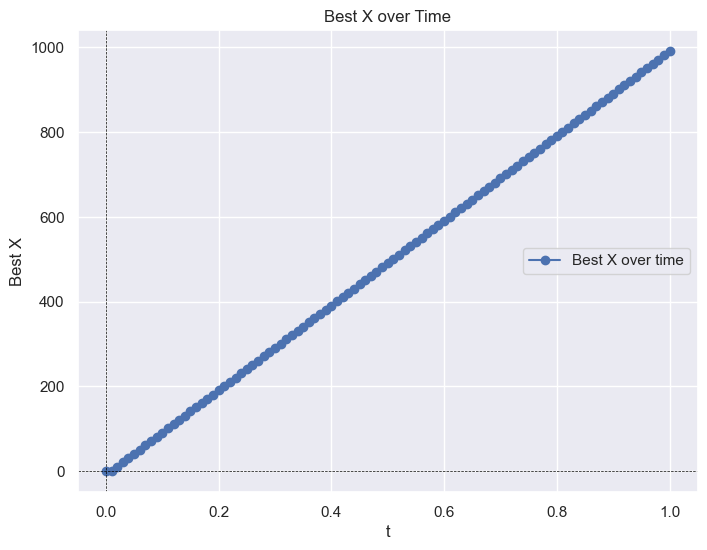

In [26]:
nSteps = 100
bestX = 0.0
startC = 0.0
endC = 1000.0
eps = 0.001
xs = [bestX]
t = 1e-3
for step in range(nSteps):
    bestX += dx_dt(bestX, t, startC, endC)/ nSteps
    print(f"Step {step+1}/{nSteps}, t={t:.2f}, bestX={bestX:.4f}, H(bestX, t)={H(bestX, t, startC, endC):.4f}")
    while jnp.abs(H(bestX, t, startC, endC)) > eps:
        bestX -= 0.01 * dH_dx(bestX, t, startC, endC)
        bestX = jnp.clip(bestX, -5.0, 5.0)
    print(f"Step {step+1}/{nSteps}, t={t:.2f}, bestX={bestX:.4f}, H(bestX, t)={H(bestX, t, startC, endC):.4f}")
    xs.append(bestX)
    t += 1/nSteps

plt.figure(figsize=(8, 6))
plt.plot(jnp.linspace(0, 1, nSteps + 1), xs, marker='o', label='Best X over time')
plt.title('Best X over Time')
plt.xlabel('t')
plt.ylabel('Best X')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.show()


In [27]:
conic1 = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, -1.0]
    ])

conic2 = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, -2.0]
    ])

conic3 = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, -3.0]
    ])

def computeSemiAxes(conic):
    eigvals = jnp.linalg.eigvals(conic[:2, :2]/conic[2, 2])
    #Take the real part of the eigenvalues
    eigvals = jnp.real(eigvals)
    return eigvals

def computeEccentricity(conic):
    semi_axes = computeSemiAxes(conic)
    semi_axesSquared = jnp.abs(semi_axes)
    eccentricity = jnp.sqrt(1 - jnp.min(semi_axesSquared) / jnp.max(semi_axesSquared))
    return eccentricity

def computeAvgEcc(conic1, conic2, conic3):
    ecc1 = computeEccentricity(conic1)
    ecc2 = computeEccentricity(conic2)
    ecc3 = computeEccentricity(conic3)
    return (ecc1 + ecc2 + ecc3) / 3

computeAvgEcc(conic1, conic2, conic3)

Array(0., dtype=float32)

In [28]:
conic1 = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, .9, 0.0],
    [0.0, 0.0, -1.0]
    ])

conic2 = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, -2.0]
    ])

conic3 = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, .1, 0.0],
    [0.0, 0.0, -3.0]
    ])

jax.jacobian(computeEccentricity)(conic1)

Array([[ 1.4230248e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.5811387e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -4.5749218e-08]], dtype=float32)

warped conic1:
[[-0.50218594 -0.30152684  1.8206806 ]
 [-0.22299281  0.27685645 -0.07853404]
 [ 0.25        0.         -0.25      ]]
warped conic2:
[[ 0.8184947  -0.30152684  0.5       ]
 [-0.30152684  0.27685645  0.        ]
 [ 0.5         0.         -0.5       ]]
warped conic3:
[[ 0.5684947  -0.30152684  0.75      ]
 [-0.30152684  0.27685645  0.        ]
 [ 0.75        0.         -0.75      ]]
Initial Warped Eccentricity: 0.8422
Iteration 1, Warped Eccentricity: 0.8278
Iteration 2, Warped Eccentricity: 0.8270
Iteration 3, Warped Eccentricity: 0.8263
Iteration 4, Warped Eccentricity: 0.8255
Iteration 5, Warped Eccentricity: 0.8247
Iteration 6, Warped Eccentricity: 0.8239
Iteration 7, Warped Eccentricity: 0.8231
Iteration 8, Warped Eccentricity: 0.8223
Iteration 9, Warped Eccentricity: 0.8214
Iteration 10, Warped Eccentricity: 0.8206
Iteration 11, Warped Eccentricity: 0.8197
Iteration 12, Warped Eccentricity: 0.8188
Iteration 13, Warped Eccentricity: 0.8180
Iteration 14, Warped Eccentr

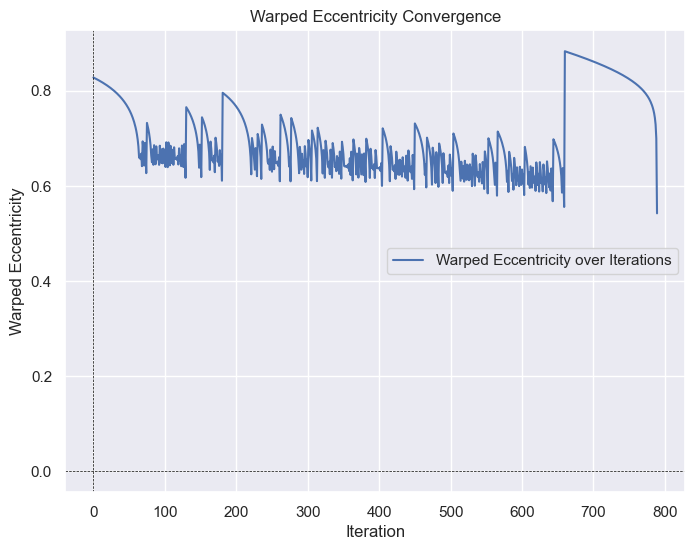

In [29]:
H_inv = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0]
])

H_True = jnp.array([
    [1, 0.1, 0.0],
    [0.9, 2.0, 0.0],
    [1, 0.1, 2.0]
])

H_treu_inv = jnp.linalg.inv(H_True)

conic1 = jnp.array([
    [1.0, 0.0, 3.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, -1.0]
    ])

conic2 = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, -2.0]
    ])

conic3 = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, -3.0]
    ])




def warpConic(conic, H_inv):
    conic_warped = jnp.dot(jnp.dot(H_inv.T, conic), H_inv)
    return conic_warped

def computeWarpedEccentricity(H_inv, c1, c2, c3):
    conic1_warped = warpConic(c1, H_inv)
    conic2_warped = warpConic(c2, H_inv)
    conic3_warped = warpConic(c3, H_inv)
    return computeAvgEcc(conic1_warped, conic2_warped, conic3_warped)

gradient = jax.grad(computeWarpedEccentricity, argnums=0)

conic1 = warpConic(conic1, H_treu_inv)
conic2 = warpConic(conic2, H_treu_inv)
conic3 = warpConic(conic3, H_treu_inv)

print(f"warped conic1:\n{conic1}")
print(f"warped conic2:\n{conic2}")
print(f"warped conic3:\n{conic3}")

print(f"Initial Warped Eccentricity: {computeWarpedEccentricity(H_treu_inv, conic1, conic2, conic3):.4f}")


eccs = []
for iter in range(1000):
    H_inv = H_inv - 0.001 * gradient(H_inv, conic1, conic2, conic3)
    warped_ecc = computeWarpedEccentricity(H_inv, conic1, conic2, conic3)
    print(f"Iteration {iter+1}, Warped Eccentricity: {warped_ecc:.4f}")
    eccs.append(warped_ecc)

print(f"Final Warped Eccentricity: {eccs[-1]:.4f}")
print(f"Final H_inv:\n{H_inv}")
print(f"Final H_inv determinant: {jnp.linalg.det(H_inv):.4f}")
print(f"H_found :\n{jnp.linalg.inv(H_inv)}")

adjConic1 = warpConic(conic1, H_inv)
adjConic2 = warpConic(conic2, H_inv)
adjConic3 = warpConic(conic3, H_inv)

print(f"Adjusted Conic 1:\n{adjConic1}")
print(f"Adjusted Conic 2:\n{adjConic2}")
print(f"Adjusted Conic 3:\n{adjConic3}")

semiAx1 = computeSemiAxes(adjConic1)
semiAx2 = computeSemiAxes(adjConic2)
semiAx3 = computeSemiAxes(adjConic3)

print(f"Semi-Axes of Adjusted Conic 1: {semiAx1}")
print(f"Semi-Axes of Adjusted Conic 2: {semiAx2}")
print(f"Semi-Axes of Adjusted Conic 3: {semiAx3}")


plt.figure(figsize=(8, 6))
plt.plot(eccs, label='Warped Eccentricity over Iterations')
plt.title('Warped Eccentricity Convergence')
plt.xlabel('Iteration')
plt.ylabel('Warped Eccentricity')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.show()
    

In [30]:
def normalizePoints(points):
    normalizer = points[0]
    # Normalize the first coordinate to 1 and second to 0
    points = points.at[0, 0].set(1.0)
    points = points.at[0, 1].set(0.0)
    denominator = jnp.linalg.norm(normalizer)
    for i in range(1, 3):
        new_x = points[i, 0] * normalizer[0] - points[i, 1] * normalizer[1]
        new_y = points[i, 1] * normalizer[0] + points[i, 0] * normalizer[1]
        new_x /= denominator
        new_y /= denominator
        points = points.at[i, 0].set(new_x)
        points = points.at[i, 1].set(new_y)
    return points

def conicError(points, C):
    points = normalizePoints(points)
    x = points[:, [0]]
    y = points[:, [1]]
    realPart = x.T @ C @ x - y.T @ C @ y
    imaginaryPart = x.T @ C @ y + y.T @ C @ x
    return (realPart**2 + imaginaryPart**2)[0, 0]

def conicsError(points, conic1, conic2, conic3):
    return (conicError(points, conic1) + 
            conicError(points, conic2) + 
            conicError(points, conic3)) / 3

print(f"Conic 1: {conic1}")
print(f"Conic 2: {conic2}")
print(f"Conic 3: {conic3}")
point = jnp.array([
    [1.0, 0.0],
    [0.2, 1.0], 
    [.0, .0]
])

conicError(point, conic1)
gradient = jax.grad(conicsError, argnums=0)

iterations = 1000
errors = []
for i in range(iterations):
    point = point - 0.01 * gradient(point, conic1, conic2, conic3)
    point = normalizePoints(point)
    error = conicsError(point, conic1, conic2, conic3)
    print(f"Iteration {i+1}, Error: {error:.4f}, Points: {point}")
    errors.append(error)

plt.figure(figsize=(8, 6))
plt.plot(errors, label='Conic Error over Iterations')
plt.title('Conic Error Convergence')
plt.xlabel('Iteration')
plt.ylabel('Conic Error')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.show()

Conic 1: [[-0.50218594 -0.30152684  1.8206806 ]
 [-0.22299281  0.27685645 -0.07853404]
 [ 0.25        0.         -0.25      ]]
Conic 2: [[ 0.8184947  -0.30152684  0.5       ]
 [-0.30152684  0.27685645  0.        ]
 [ 0.5         0.         -0.5       ]]
Conic 3: [[ 0.5684947  -0.30152684  0.75      ]
 [-0.30152684  0.27685645  0.        ]
 [ 0.75        0.         -0.75      ]]
Iteration 1, Error: 0.5131, Points: [[1.         0.        ]
 [0.21057113 0.99346024]
 [0.00712337 0.01428953]]
Iteration 2, Error: 0.4848, Points: [[1.         0.        ]
 [0.22049583 0.98738647]
 [0.01387969 0.02747081]]
Iteration 3, Error: 0.4602, Points: [[1.         0.        ]
 [0.22983885 0.98174286]
 [0.02029479 0.03963828]]
Iteration 4, Error: 0.4390, Points: [[1.         0.        ]
 [0.23865733 0.9764967 ]
 [0.02639242 0.05087659]]
Iteration 5, Error: 0.4204, Points: [[1.         0.        ]
 [0.24700183 0.971618  ]
 [0.03219436 0.06126186]]
Iteration 6, Error: 0.4043, Points: [[1.         0.        

KeyboardInterrupt: 

In [ ]:
#plot the derivative of the history
plt.figure(figsize=(8, 6))
plt.plot(jnp.arange(1, iterations + 1), jnp.gradient(errors), label='Conic Error Gradient')
plt.title('Conic Error Gradient over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Gradient of Conic Error')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.show()

TypeError: Cannot determine dtype of [Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>, Traced<float32[]>with<DynamicJaxprTrace>]

<Figure size 800x600 with 0 Axes>